In [199]:
##Do the required imports

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
##Make sure the file is in the same path as the notebook
##For the simplicity , Thiago.csv already has the necessary data to work on.
df = pd.read_csv('Thiago.csv')

In [201]:
##Drop the duplicate.
##We have to drop  them as some of the players had switched the clubs during winter transfer and it creates some incorrect data.

df = df.drop(columns = ['Unnamed: 0' , 'Rk'] , axis=1)
df = df.drop_duplicates(['Player'])

In [202]:
##Decide the criteria for minimum minutes played
df['Min'].mean()

1054.3507014028055

In [203]:
##Make sure that Thiago has played more minutes than the average of all players
df[df['Player'] == 'Thiago Alcantara']['Min']

11    1061
Name: Min, dtype: int64

In [204]:
##For Thiago , we'll compare him with only CMs and CAMs
clean_df = df[df['Min'] > df['Min'].mean()][(df['Pos'] == 'MF') | (df['Pos'] == 'FW')| (df['Pos'] == 'FWMF') | (df['Pos'] == 'MFFW')]

<ipython-input-204-23c46cf2f69a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = df[df['Min'] > df['Min'].mean()][(df['Pos'] == 'MF') | (df['Pos'] == 'FW')| (df['Pos'] == 'FWMF') | (df['Pos'] == 'MFFW')]


In [205]:
## Let's take a look at the Final dataset
clean_df

,Player,Nation,Pos,Squad,Age,Born,90s,Cmp,Att,Cmp%,...,one-third,PPA,CrsComp,Prog,Matches,Min,Aer_Due_won,Aer_Due_win%,carry_PrgDist,Press_Pass
2,Che Adams,eng ENG,FW,Southampton,24-237,1996,22.1,14.4,20.8,69.3,...,0.95,0.59,0.00,1.86,Matches,1985,1.18,20.5,34.8,5.34
11,Thiago Alcantara,es ESP,MF,Liverpool,29-330,1991,11.8,76.0,85.7,88.7,...,9.58,0.93,0.08,8.90,Matches,1061,1.44,54.8,151.5,9.41
17,Allan,br BRA,MF,Everton,30-058,1991,12.8,40.2,46.6,86.4,...,3.44,0.63,0.00,2.58,Matches,1151,0.00,0.0,123.5,5.16
19,Miguel Almiron,py PAR,MFFW,Newcastle Utd,27-025,1994,17.6,27.7,34.3,80.6,...,1.99,1.19,0.40,2.44,Matches,1583,0.34,31.6,113.9,4.83
27,Michail Antonio,eng ENG,FW,West Ham,30-344,1990,13.8,12.8,20.2,63.1,...,0.87,0.29,0.00,1.01,Matches,1241,2.83,35.1,70.0,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Callum Wilson,eng ENG,FW,Newcastle Utd,29-008,1992,20.1,11.2,16.1,69.4,...,0.45,0.65,0.00,0.95,Matches,1812,1.69,22.8,60.7,5.52
735,Chris Wood,nz NZL,FW,Burnley,29-090,1991,20.9,14.0,21.1,66.4,...,0.72,0.19,0.00,1.05,Matches,1877,5.31,48.9,17.0,8.56
736,Granit Xhaka,ch SUI,MF,Arsenal,28-161,1992,21.1,64.6,72.6,89.0,...,8.67,1.14,0.00,7.54,Matches,1896,1.61,54.8,161.8,8.67
740,Wilfried Zaha,ci CIV,FW,Crystal Palace,28-117,1992,18.5,20.6,27.2,75.7,...,0.86,1.08,0.16,2.11,Matches,1667,0.43,26.7,108.6,6.11


C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the f

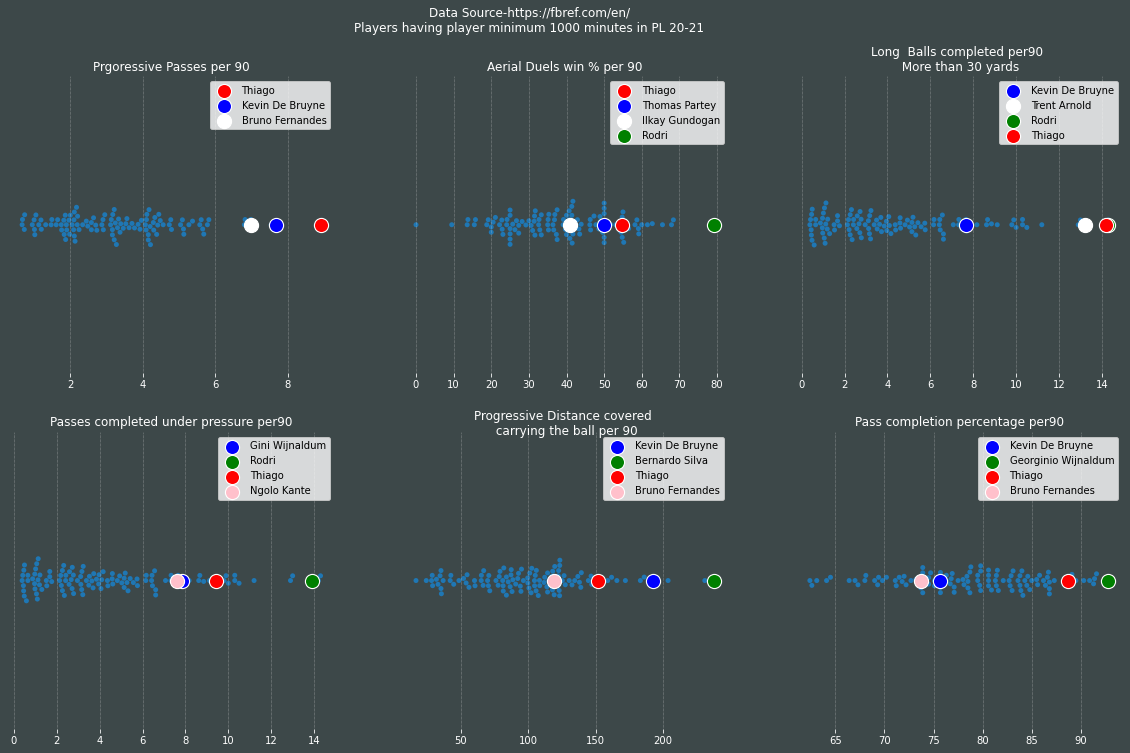

In [309]:
##Create a figure

fig = plt.figure(figsize=(20,12))
##Color for the face
fig.set_facecolor('#3d4849')
##We'll be looking at 6 different aspects.So 6 different subplots for the same.
ax1 = fig.add_subplot(231)
ax = ax1
ax.set_facecolor('#3d4849')
##Try to make it more attractive 
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
##
##Our main swarmplot
##This one considers the progressive passes made per 90  mins
sns.swarmplot(clean_df['Prog'] , zorder = 1  )
##highliht all the players of your choice
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['Prog'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')
sns.scatterplot(x = df[df['Player'] == 'Kevin De Bruyne']['Prog'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Kevin De Bruyne')
sns.scatterplot(x = df[df['Player'] == 'Bruno Fernandes']['Prog'] , y = 0 , color = 'White' , s=200, zorder = 2 , label = 'Bruno Fernandes')
##Set the title for the subplot
ax.set_title('Prgoressive Passes per 90' , color = 'white')

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
##Remove spines
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax1.spines[x].set_visible(False)
ax.set_xlabel(None)    
    
##Do the same code above for all the subplots    

ax2 = fig.add_subplot(232)    
ax = ax2
ax.set_facecolor('#3d4849')
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
sns.swarmplot(clean_df['Aer_Due_win%'] , zorder = 1  )
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['Aer_Due_win%'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')
sns.scatterplot(x = df[df['Player'] == 'Thomas Partey']['Aer_Due_win%'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Thomas Partey')
sns.scatterplot(x = df[df['Player'] == 'Ilkay Gundogan']['Aer_Due_win%'] , y = 0 , color = 'White' , s=200, zorder = 2 , label = 'Ilkay Gundogan')
sns.scatterplot(x = clean_df[clean_df['Aer_Due_win%'] == clean_df['Aer_Due_win%'].max()]['Aer_Due_win%'] ,
                y = 0 , color = 'green' , s=200, zorder = 2 , label = 'Rodri')

clean_df[clean_df['Aer_Due_win%'] == clean_df['Aer_Due_win%'].max()]
ax.set_title('Aerial Duels win % per 90' , color = 'white')

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax.spines[x].set_visible(False)
ax.set_xlabel(None)    
    
    
    
    
ax3 = fig.add_subplot(233)    
ax = ax3
ax.set_facecolor('#3d4849')
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
sns.swarmplot(clean_df['long_Cmp'] , zorder = 1  )

sns.scatterplot(x = df[df['Player'] == 'Kevin De Bruyne']['long_Cmp'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Kevin De Bruyne')
sns.scatterplot(x = df[df['Player'] == 'Trent Alexander Arnold']['long_Cmp'] , y = 0 , color = 'White' , s=200, zorder = 2 , label = 'Trent Arnold')
sns.scatterplot(x = clean_df[clean_df['long_Cmp'] == clean_df['long_Cmp'].max()]['long_Cmp'] ,
                y = 0 , color = 'green' , s=200, zorder = 2 , label = 'Rodri')
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['long_Cmp'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')

ax.set_title('Long  Balls completed per90 \n More than 30 yards' , color = 'white')

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax.spines[x].set_visible(False)
ax.set_xlabel(None)    
    
    

    
ax4 = fig.add_subplot(234)    
ax = ax4
ax.set_facecolor('#3d4849')
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
sns.swarmplot(clean_df['long_Cmp'] , zorder = 1  )

sns.scatterplot(x = df[df['Player'] == 'Georginio Wijnaldum']['Press_Pass'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Gini Wijnaldum')
sns.scatterplot(x = clean_df[clean_df['Press_Pass'] == clean_df['Press_Pass'].max()]['Press_Pass'] ,
                y = 0 , color = 'green' , s=200, zorder = 2 , label = clean_df.sort_values(by = 'Press_Pass' , ascending = False ).iloc[0]['Player'])
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['Press_Pass'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')
sns.scatterplot(x = df[df['Player'] == "NGolo Kante"]['Press_Pass'] , y = 0 , color = 'pink' , s=200, zorder = 2 , label = 'Ngolo Kante')


ax.set_title('Passes completed under pressure per90' , color = 'white')

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax.spines[x].set_visible(False)
ax.set_xlabel(None)    
    

    
    
ax5 = fig.add_subplot(235)    
ax = ax5
ax.set_facecolor('#3d4849')
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
sns.swarmplot(clean_df['carry_PrgDist'] , zorder = 1  )

sns.scatterplot(x = df[df['Player'] == 'Kevin De Bruyne']['carry_PrgDist'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Kevin De Bruyne')
#sns.scatterplot(x = df[df['Player'] == 'Trent Alexander Arnold']['Press_Pass'] , y = 0 , color = 'White' , s=200, zorder = 2 , label = 'Trent Arnold')
sns.scatterplot(x = clean_df[clean_df['carry_PrgDist'] == clean_df['carry_PrgDist'].max()]['carry_PrgDist'] ,
                y = 0 , color = 'green' , s=200, zorder = 2 , label = clean_df.sort_values(by = 'carry_PrgDist' , ascending = False ).iloc[0]['Player'])
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['carry_PrgDist'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')
sns.scatterplot(x = df[df['Player'] == "Bruno Fernandes"]['carry_PrgDist'] , y = 0 , color = 'pink' , s=200, zorder = 2 , label = 'Bruno Fernandes')

ax.set_title('Progressive Distance covered \n carrying the ball per 90' , color = 'white' , y = 0.97)

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax.spines[x].set_visible(False)
ax.set_xlabel(None)    
    
    
ax6 = fig.add_subplot(236)    
ax = ax6
ax.set_facecolor('#3d4849')
ax.tick_params(axis = 'x' , colors = 'white')
ax.axes.yaxis.set_visible(False)
sns.swarmplot(clean_df['Cmp%'] , zorder = 1  )

sns.scatterplot(x = df[df['Player'] == 'Kevin De Bruyne']['Cmp%'] , y = 0 , color = 'blue' , s=200, zorder = 2 , label = 'Kevin De Bruyne')
sns.scatterplot(x = clean_df[clean_df['Cmp%'] == clean_df['Cmp%'].max()]['Cmp%'] ,
                y = 0 , color = 'green' , s=200, zorder = 2 , label = clean_df.sort_values(by = 'Cmp%' , ascending = False ).iloc[0]['Player'])
sns.scatterplot(x = df[df['Player'] == 'Thiago Alcantara']['Cmp%'] , y = 0 , color = 'red' , s=200, zorder = 2 , label = 'Thiago')
sns.scatterplot(x = df[df['Player'] == "Bruno Fernandes"]['Cmp%'] , y = 0 , color = 'pink' , s=200, zorder = 2 , label = 'Bruno Fernandes')

ax.set_title('Pass completion percentage per90' , color = 'white')

plt.grid(ls='dotted',lw=.5,color='lightgrey',axis='x')
spines = ['top' , 'bottom' , 'left' , 'right']
for x in spines :
    ax.spines[x].set_visible(False)
    
ax.set_xlabel(None)


##Save the Figure
plt.text(s = 'Data Source-https://fbref.com/en/\nPlayers having player minimum 1000 minutes in PL 20-21' , x= 16 , y = -1.85 , fontdict={'ma' : 'center' , 'size' : 12 , 'color' : 'white'})
plt.savefig('Thiago.jpeg' , dpi = 700)